In [37]:
import requests
import pandas as pd
import numpy as np
import healpy as hp
import subprocess as sp
import ligo.skymap.plot
import matplotlib.pyplot as plt
from datetime import datetime
from astropy.time import Time
from ligo.skymap.io import read_sky_map

In [36]:
#getting data products link from GCN
basepath = "https://gcn.gsfc.nasa.gov/other/"
triggers = pd.DataFrame(pd.read_csv("/home/ravioli/astro/git/fermi_grbs/u_triggers_with_probs.csv"))
for i, trigger in enumerate(triggers['Trig_no'][1700:]):
    print(trigger, i)
    r = requests.get(f"{basepath}/{trigger}.fermi").text
    date = r[r.rfind("NOTICE_DATE:")+17:r.rfind("NOTICE_DATE:")+39]
    os.system(f"python3 program_for_emgw_mapping.py -input_file 
              /home/ravioli/astro/git/fermi_grbs/data/glg_healpix_all_{triggers['GRBName'][i]}.fit -time '{date}' -trig_no {trigger}")

712945515
Sat 05 Aug 23 17:15:52
2023-08-23 20:50:22.855285
2023-08-05 17:15:52


In [2]:
Time(datetime(2023, 5, 12, 4, 36, 45, 450000), format="datetime", scale="utc")

<Time object: scale='utc' format='datetime' value=2023-05-12 04:36:45.450000>

In [3]:
Time.now()

<Time object: scale='utc' format='datetime' value=2023-08-23 18:37:59.325177>

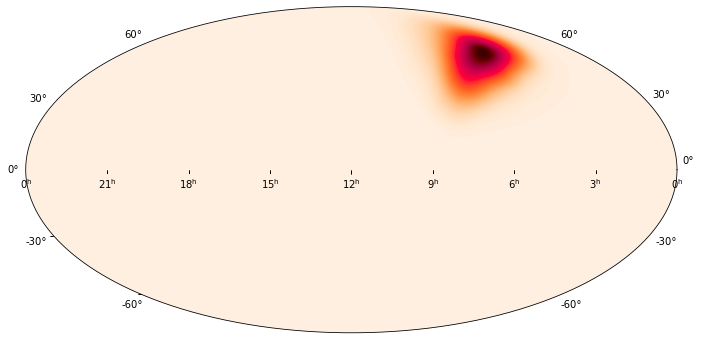

In [9]:
skymap = read_sky_map("/home/ravioli/astro/git/fermi_grbs/glg_healpix_all_bn230805684.fit")
hpmap = skymap[0]

fig, axes = plt.subplots(1, 1, figsize=(12, 6), subplot_kw={'projection': 'astro hours mollweide'})
axes.imshow_hpx(hpmap, cmap='cylon')

In [5]:
tiling_cmd = "python3 program_for_emgw_mapping.py \
    -input_file /home/ravioli/astro/git/fermi_grbs/glg_healpix_all_bn230805684.fit \
    -ouput_dir /home/ravioli/astro/git/fermi_grbs/ \
    -config_tile_file /home/ravioli/astro/git/growth-scripts-main/config_files/gal_tiles.csv"
result = sp.run(tiling_cmd, shell=True, stdout=sp.PIPE)
print(result.stdout.decode('utf-8'))

processing map

